# Consider the steady-state vibrations of a string subjected to distributed viscous damping under a harmonic force #

In [1]:
import sympy as sp

We represent the harmonic time-dependence by $e^{i \Omega t}$. The real part of the response to this load will give the response to the corresponding cosinusoidal load , whereas the imaginary part will give the response to the corresponding sinusoidal load

Let us write the equation of motion

In [2]:
w = sp.symbols('w',cls=sp.Function)
q1 = sp.symbols('q1',cls=sp.Function)
x,t = sp.symbols('x t')
nd, c, Omega= sp.symbols('nd c Omega',real=True)

In [3]:
q1_second_normal_mode = sp.sin(2 * sp.pi * x / 1)
q1_arbitrary = 14.39 * x **5 * (x - 1)
q1_constant = 1
q1 = q1_arbitrary

In [4]:
EQM = sp.diff(w(x,t),t,2) + 2 * nd * sp.diff(w(x,t),t) - c**2 * sp.diff(w(x,t),x,2) - q1*sp.exp(sp.I*Omega*t)
display(EQM)

-c**2*Derivative(w(x, t), (x, 2)) + 2*nd*Derivative(w(x, t), t) - 14.39*x**5*(x - 1)*exp(I*Omega*t) + Derivative(w(x, t), (t, 2))

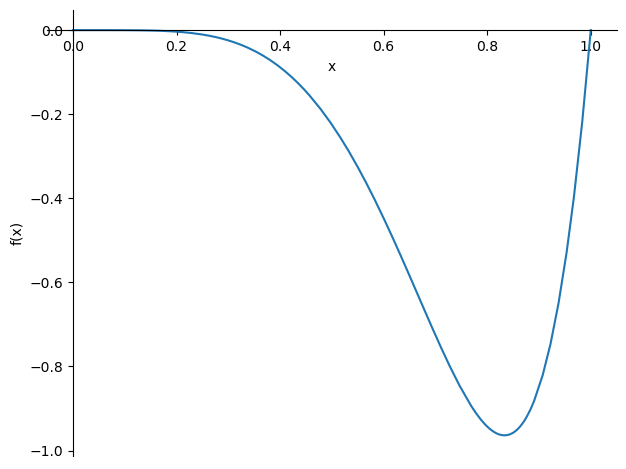

In [5]:
sp.plot(q1, (x, 0, 1));

We search for the steady-state solution in the form:

In [6]:
W = sp.symbols('W',cls=sp.Function)
w_form = W(x) * sp.exp(sp.I * Omega * t)

Substitution of this equation in the equation of motion gives:

In [7]:
EQM_fr = sp.simplify(EQM.subs(w(x,t),w_form))
display(EQM_fr)

-Omega**2*W(x)*exp(I*Omega*t) + 2*I*Omega*nd*W(x)*exp(I*Omega*t) - c**2*exp(I*Omega*t)*Derivative(W(x), (x, 2)) + 14.39*x**5*(1 - x)*exp(I*Omega*t)

$e^{i \Omega t}$ is not dropped, so can dropped manually, not necessary:

In [8]:
display(EQM_fr.subs(sp.exp(sp.I * Omega * t),1))

-Omega**2*W(x) + 2*I*Omega*nd*W(x) - c**2*Derivative(W(x), (x, 2)) + 14.39*x**5*(1 - x)

Let us find the soluton to this equation that satisfies the boundary conditions of a fixed-fixed string

In [9]:
L = sp.symbols('L',real=True)
W_sol = sp.dsolve(EQM_fr.subs(sp.exp(sp.I * Omega * t),1),W(x),ics={W(0):0,W(L):0}).rhs

(-1439.0*L**6*Omega**6*exp(1.4142135623731*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c)/(100.0*Omega**8*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) - 100.0*Omega**8 - 800.0*I*Omega**7*nd*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) + 800.0*I*Omega**7*nd - 2400.0*Omega**6*nd**2*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) + 2400.0*Omega**6*nd**2 + 3200.0*I*Omega**5*nd**3*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) - 3200.0*I*Omega**5*nd**3 + 1600.0*Omega**4*nd**4*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) - 1600.0*Omega**4*nd**4) + 8634.0*I*L**6*Omega**5*nd*exp(1.4142135623731*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c)/(100.0*Omega**8*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) - 100.0*Omega**8 - 800.0*I*Omega**7*nd*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) + 800.0*I*Omega**7*nd - 2400.0*Omega**6*nd**2*exp(2.82842712474619*L*sqrt(-0.5*Omega**2 + I*Omega*nd)/c) + 2400.0*Omega**6*nd**2 + 3200.0*I

We introduce numerical values for the parameters

In [10]:
W_sol = W_sol.subs([(L,1),(c,2),(nd,1/2)])

(-57560.0*Omega**4*exp(0.5*sqrt(-Omega**2 + I*Omega))/(100.0*Omega**8*exp(1.0*sqrt(-Omega**2 + I*Omega)) - 100.0*Omega**8 - 400.0*I*Omega**7*exp(1.0*sqrt(-Omega**2 + I*Omega)) + 400.0*I*Omega**7 - 600.0*Omega**6*exp(1.0*sqrt(-Omega**2 + I*Omega)) + 600.0*Omega**6 + 400.0*I*Omega**5*exp(1.0*sqrt(-Omega**2 + I*Omega)) - 400.0*I*Omega**5 + 100.0*Omega**4*exp(1.0*sqrt(-Omega**2 + I*Omega)) - 100.0*Omega**4) + 115120.0*I*Omega**3*exp(0.5*sqrt(-Omega**2 + I*Omega))/(100.0*Omega**8*exp(1.0*sqrt(-Omega**2 + I*Omega)) - 100.0*Omega**8 - 400.0*I*Omega**7*exp(1.0*sqrt(-Omega**2 + I*Omega)) + 400.0*I*Omega**7 - 600.0*Omega**6*exp(1.0*sqrt(-Omega**2 + I*Omega)) + 600.0*Omega**6 + 400.0*I*Omega**5*exp(1.0*sqrt(-Omega**2 + I*Omega)) - 400.0*I*Omega**5 + 100.0*Omega**4*exp(1.0*sqrt(-Omega**2 + I*Omega)) - 100.0*Omega**4) + 5583320.0*Omega**2*exp(0.5*sqrt(-Omega**2 + I*Omega))/(100.0*Omega**8*exp(1.0*sqrt(-Omega**2 + I*Omega)) - 100.0*Omega**8 - 400.0*I*Omega**7*exp(1.0*sqrt(-Omega**2 + I*Omega)) + 400

Let us animate the reponses to these two loads assuming that the time-depandence is sinusoidal and introducing a numerical value of the load frequency: $\Omega=5$

In [11]:
W_sol_sin = sp.im(W_sol*sp.exp(sp.I*Omega*t))

In [12]:
%matplotlib notebook

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [14]:
W_sol_func = sp.lambdify((x,t,Omega),W_sol_sin)

<IPython.core.display.Javascript object>


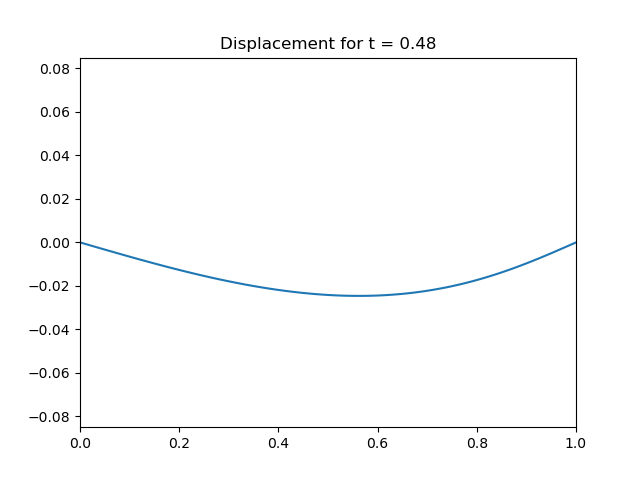

In [15]:
fig, ax = plt.subplots()
xdata = np.linspace(0,1,100)
line1, = ax.plot([], [])
ax.set_xlim(0, 1)
ax.set_ylim(-0.085,0.085)
frame = 0.1

def update(frame):
    ydata1 = W_sol_func(x=xdata,t=frame,Omega=5)
    ax.set_title("Displacement for t = "+str(np.round(frame,2)))
    line1.set_data(xdata, ydata1)

ani = FuncAnimation(fig, update, frames=np.linspace(0,2*np.pi/5,100),interval = 100)
plt.show()

Now we plot the amplitude-frequency response functions at two locations along the string for the two load shapes

<IPython.core.display.Javascript object>


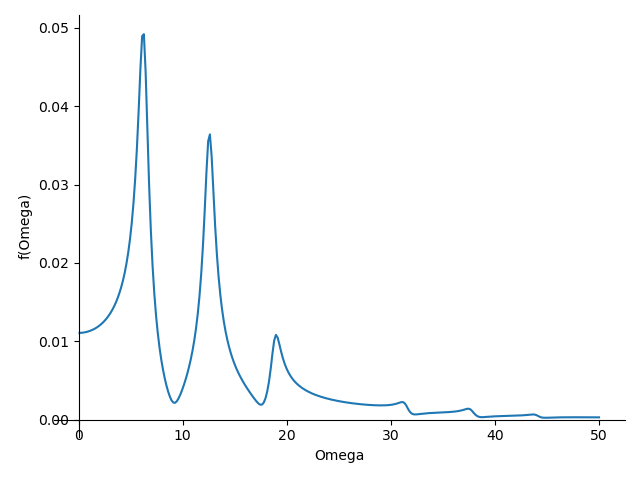

In [16]:
AFRF_sol = sp.Abs(W_sol.subs(x,3/4))
sp.plot(AFRF_sol,(Omega,0.1,50),adaptive=False);

Let us animate the reponses to these two loads assuming that the time-depandence is sinusoidal and introducing a numerical value of the load frequency: $\Omega=13$

<IPython.core.display.Javascript object>


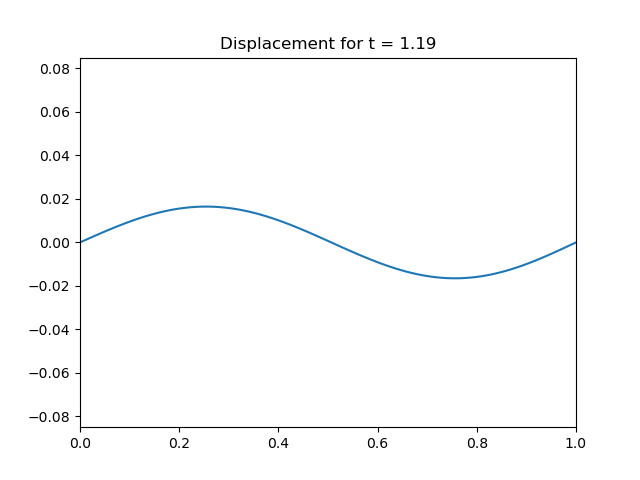

In [17]:
fig, ax = plt.subplots()
xdata = np.linspace(0,1,100)
line1, = ax.plot([], [])
ax.set_xlim(0, 1)
ax.set_ylim(-0.085,0.085)
frame = 0.1

def update(frame):
    ydata1 = W_sol_func(x=xdata,t=frame,Omega=13)
    ax.set_title("Displacement for t = "+str(np.round(frame,2)))
    line1.set_data(xdata, ydata1)

ani = FuncAnimation(fig, update, frames=np.linspace(0,2*np.pi/5,100),interval = 100)
plt.show()